# Bankruptcy in the Netherlands

## Course: Programming with data (INFOB2PWD)

### Students: Annette Holst, Georg Vasiliv, Robin Papenhuijzen and Rina van Woerden

This data set contains information on the number of bankruptcy orders issued by Dutch Courts. The data is categorized based on the type of bankruptcy. It can be natural persons with or without sole proprietorship, enterprises, institutions and geographical regions.
The time span of this dataset is from January 2009 till February 2025. The latest figures are subject to revision and the last two months are provisional.

The time span of this dataset is from January 2009 till February 2025. The latest figures are subject to revision and the last two months are provisional.

First, an overview of the data set will be given and the data set will be prepared for the analysis. Then the following research' questions will be explored:
* How have bankruptcy rates changed over time?
  * Using method: XXX
* How do bankruptcy trends differ across different geographical regions?
  * Using method: XXX
* How do bankruptcy trends differ between the Randstad and the suburbs?
  * Using method: XXX
* How did bankruptcy trends differ for businesses with and without sole proprietorships before and after COVID-19?
  * Using method: XXX


### NOG DOEN !!! : Longer pieces of code, especially when not directly meaningful for the narrative (for example details of the data pre-processing when loading the data from the CSV files), are stored in separate .py modules and imported to the notebook

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Transforming the csv-file to a data frame
df = pd.read_csv("82522ENG_UntypedDataSet_20032025_155613.csv", sep = ";")
# Overview of the data set
df.head()

,ID,TypeOfBankruptcy,Regions,Periods,PronouncedBankruptcies_1
0,0,A047596,NL00,2009MM01,563
1,1,A047596,NL00,2009MM02,601
2,2,A047596,NL00,2009MM03,768
3,3,A047596,NL00,2009KW01,1932
4,4,A047596,NL00,2009MM04,717


In [3]:
# Shows the size of the data set and the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49320 entries, 0 to 49319
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        49320 non-null  int64 
 1   TypeOfBankruptcy          49320 non-null  object
 2   Regions                   49320 non-null  object
 3   Periods                   49320 non-null  object
 4   PronouncedBankruptcies_1  49320 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB
None


In [4]:
# Statistics of the data set
print(df.describe())

                 ID  PronouncedBankruptcies_1
count  49320.000000              49320.000000
mean   24659.500000                 51.365977
std    14237.601975                246.609041
min        0.000000                  0.000000
25%    12329.750000                  2.000000
50%    24659.500000                  8.000000
75%    36989.250000                 27.000000
max    49319.000000               9431.000000


In [5]:
# Count unique values of tye of bankruptcy
type_bankruptcy = df.value_counts('TypeOfBankruptcy')
print(type_bankruptcy)

# Count unique values of regions (output not shown here, because there are many reasons)
# regions = df.value_counts('Regions')
# print(regions)

TypeOfBankruptcy
A028820    16440
A047596    16440
A047597    16440
Name: count, dtype: int64


As shown, there are three types of bankruptcies: A028820, A047596 and A047597    
Each type of bankruptcy has 16.440 rows.

As deriven from the meta-data, the codes mean the following:
* *A028820*: Nat. person with sole proprietorship
    * A legal form without legal personality, where one natural person owns the business. The owner is entirely liable for all business and capital matters. There is no distinction between business assets and personal assets.
* *A047596* stands for Total entities with/without legal pers.
    * Total entities with and without legal personality and sole proprietors
* *A047597* stands for Companies and institutions
    * Partnerships without legal personality and legal entities
 
To make the data set more clear, we will rename these codes to:
* A028820: only_sole_prop
* A047596: total
* A047597: without_sole_prop

In [30]:
# Renaming types of bankruptcies
df = df.replace('A028820','only_sole_prop')
df = df.replace('A047596','total')
df = df.replace('A047597','without_sole_prop') 

# Check if succeeded
type_bankruptcy = df.value_counts('TypeOfBankruptcy')
print(type_bankruptcy)

TypeOfBankruptcy
only_sole_prop       16440
total                16440
without_sole_prop    16440
Name: count, dtype: int64


In [31]:
i = 20
t = 0
# List of provinces
list = ['Groningen', 'Fryslan', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
# For-loop to replace provinces indexes with names
for i in range(20,32):
    df = df.replace(f'PV{i}  ',f'{list[t]}')
    t = t + 1

# Check if it worked
# regions = df.value_counts('Regions')
# print(regions)

In [32]:
# Missing values => meta-data?

Research 1:

Research 2:

Research 3:

Research 4:

Last week a news article in the Netherlands was published about the economical impact of COVID on the Netherlands (Schallenberg, 2025). The expectation at the beginning of COVID-19 was that businesses with little to no revenue would go bankrupt, but in reality fewer and fewer businesses went bankrupt. According to the article it was only in 2024 that bankruptcies exceeded pre-COVID levels. It would be interesting to see if bankruptcy trends differ accros different types of proprietorship: companies only with and without sole proprietorship. This leads to the following research' question: How did bankruptcy trends differ for businesses with and without sole proprietorships before and after COVID-19?





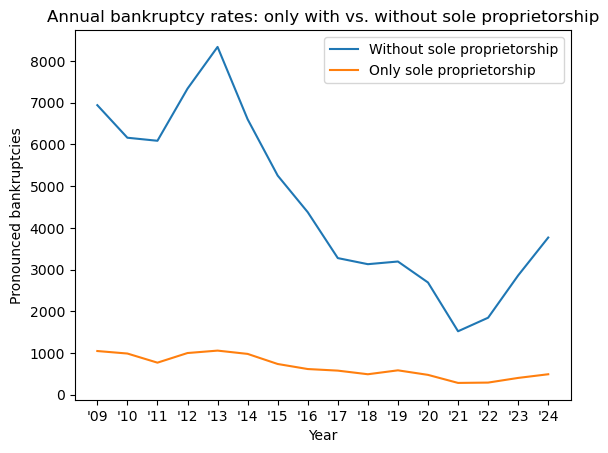

In [48]:
# Create a subset of the data without sole prorietory every year in the Netherlands
df_without_sol = df[df["Periods"].astype(str).str.contains("JJ", na=False) & df["Regions"].astype(str).str.contains("NL01", na=False) & df["TypeOfBankruptcy"].astype(str).str.contains("without_sole_prop", na=False)]
# Create a subset of the data with only sole prorietory every year in the Netherlands
df_only_sol = df[df["Periods"].astype(str).str.contains("JJ", na=False) & df["Regions"].astype(str).str.contains("NL01", na=False) & df["TypeOfBankruptcy"].astype(str).str.contains("only_sole_prop", na=False)]

# Function to replace period names with shortened names with a more readable format
def dataframe(z):
    i = 0 
    year = 2009
    count = 9
    for i in range(0,23):
        if count == 9:
            z = z.replace(f"{year}JJ00" ,f"'0{count}")
            year = year + 1
            count = count + 1
        else:
            z = z.replace(f"{year}JJ00" ,f"'{count}")
            year = year + 1
            count = count + 1
    return z

# Applying the functions on the subsets
df_without_sol = dataframe(df_without_sol)
df_only_sol = dataframe(df_only_sol)

# Combining the dataframes into one plot
x = df_only_sol["Periods"]
y1 = df_without_sol["PronouncedBankruptcies_1"]
y2 = df_only_sol["PronouncedBankruptcies_1"]
plt.plot(x, y1, label='Without sole proprietorship')
plt.plot(x, y2, label='Only sole proprietorship')
plt.legend()
plt.title('Annual bankruptcy rates: only with vs. without sole proprietorship')
plt.xlabel('Year')
plt.ylabel('Pronounced bankruptcies')
plt.show()


How do bankruptcy trend differ across different types (proprietorship, enterprises, institutions)
Covid => meer impact op eenmanszaken? (inclusief en exclusief vergelijken)
Vóór, na en tijdens corona
Method: Bar charts, that shows the number of bankruptcies for each type (natural persons, enterprises, institutions). 

### Literature
Schallenberg, L. (2025, March 16). 5 jaar na uitbreken coronacrisis: 'een economisch mirakel'. *NOS*. https://nos.nl/artikel/2559796-5-jaar-na-uitbreken-coronacrisis-een-economisch-mirakel

*pandas.DataFrame.replace*. Retrieved March 21, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

*Plot Multiple lines in Matplotlib*. (2024, Augustus 14). Retrieved March 21, 2025, from  https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

*pandas.DataFrame.value_counts*. Retrieved March 21, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

